In [1]:
#hide
#skip
! [ -e /content ] && pip install -Uqq fastai  # upgrade fastai on colab

     |████████████████████████████████| 194kB 11.6MB/s 
     |████████████████████████████████| 61kB 7.5MB/s 


In [2]:
import scipy
import datetime as dt
import warnings
import time
import os
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
from heapq import nlargest 
from sklearn.metrics import mean_squared_error
import seaborn as sbn
import seaborn as sns
from sklearn.feature_selection import RFE
sns.set(rc={'figure.figsize':(16,6)})
warnings.filterwarnings(action='ignore')
pd.set_option('display.max_columns', None)  
pd.set_option('display.max_rows', 500)  
import PIL
import tensorflow as tf
from tqdm import tqdm
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()
from fastbook import *
from fastai.vision.widgets import *

     |████████████████████████████████| 727kB 13.0MB/s 
     |████████████████████████████████| 1.1MB 45.9MB/s 
     |████████████████████████████████| 51kB 8.8MB/s 
Mounted at /content/gdrive


In [4]:
!cp /content/gdrive/MyDrive/project/HackerEarth/STILLthe_season_to_be_jolly/dataset.zip /content/
!cp /content/gdrive/MyDrive/project/HackerEarth/STILLthe_season_to_be_jolly/fastai_1_7_gpu.txt /content/
!pip install -r fastai_1_7_gpu.txt
!unzip dataset.zip
%cd dataset/

Streaming output truncated to the last 5000 lines.
  inflating: dataset/train/image7383.jpg  
  inflating: dataset/train/image5498.jpg  
  inflating: dataset/train/image6955.jpg  
  inflating: dataset/train/image4840.jpg  
  inflating: dataset/train/image2695.jpg  
  inflating: dataset/train/image524.jpg  
  inflating: dataset/train/image1074.jpg  
  inflating: dataset/train/image3524.jpg  
  inflating: dataset/train/image3570.jpg  
  inflating: dataset/train/image8561.jpg  
  inflating: dataset/train/image5242.jpg  
  inflating: dataset/train/image567.jpg  
  inflating: dataset/train/image8431.jpg  
  inflating: dataset/train/image529.jpg  
  inflating: dataset/train/image5156.jpg  
  inflating: dataset/train/image6005.jpg  
  inflating: dataset/train/image6678.jpg  
  inflating: dataset/train/image9808.jpg  
  inflating: dataset/train/image1214.jpg  
  inflating: dataset/train/image6836.jpg  
  inflating: dataset/train/image949.jpg  
  inflating: dataset/train/image1113.jpg  
  infla

# Reading files

In [5]:
import os 
if __name__ == "__main__": 
    for (root,dirs,files) in os.walk(r'/content/dataset', topdown=True): 
        print (root) 

/content/dataset
/content/dataset/train
/content/dataset/test


In [6]:
# Load train and test csv file for image class
train_original = pd.read_csv('train.csv')
#test_original = pd.read_csv('test.csv')

In [7]:
train = train_original.copy()
#test = test_original.copy()

#train['image_id'] = train['image_id']+str('.jpg')
#test['image_id'] = test['image_id']+str('.jpg')

train.to_csv('Train_custom.csv',index=False)
#test.to_csv('Test_custom.csv',index=False)
train.head()

,Image,Class
0,image3476.jpg,Miscellaneous
1,image5198.jpg,Candle
2,image4183.jpg,Snowman
3,image1806.jpg,Miscellaneous
4,image7831.jpg,Miscellaneous


# create dataset 
in different folders that we can pass directly to our model

In [8]:
!mkdir created
!mkdir created/train_set

In [9]:
for i in train.Class.unique():
  os.mkdir("created/train_set/"+i)
#for i in train.breed.unique():
 # shutil.rmtree("created/train_set/"+i)

In [10]:
import shutil
for i,j in zip(train.Image,train.Class):
    try:
      source = "/content/dataset/train/"+i
      #img = cv2.imread(source)
      destination = "created/train_set/"+j+"/"+i
      #img = cv2.resize(img, (224, 224,3))
      #cv2.imwrite(destination, img)
      shutil.copy(source, destination)
    except:
      continue  

In [11]:
for i in train.Class.unique():
  print(i ," : ",len(os.listdir("created/train_set/"+i)))

Miscellaneous  :  2801
Candle  :  593
Snowman  :  361
Airplane  :  535
Christmas_Tree  :  1539
Jacket  :  640


In [12]:
import os 
if __name__ == "__main__": 
    for (root,dirs,files) in os.walk(r'/content/dataset', topdown=True): 
        print (root) 

/content/dataset
/content/dataset/train
/content/dataset/test
/content/dataset/created
/content/dataset/created/train_set
/content/dataset/created/train_set/Jacket
/content/dataset/created/train_set/Candle
/content/dataset/created/train_set/Airplane
/content/dataset/created/train_set/Miscellaneous
/content/dataset/created/train_set/Snowman
/content/dataset/created/train_set/Christmas_Tree


# FASTAI

In [13]:
path = Path ('/content/dataset/created/train_set')

In [14]:
item_tfms= Resize(128, ResizeMethod.Squish)
item_tfms=Resize(128, ResizeMethod.Pad, pad_mode='zeros')
item_tfms=RandomResizedCrop(128, min_scale=0.3) # 30% of the image area is zoomed by specifying 0.3

In [15]:
tfms = aug_transforms(do_flip = True, flip_vert = False, mult=2.0)

In [17]:
data= ImageDataLoaders.from_folder(path,train = "train", valid_pct=0.1, item_tfms=Resize(128), batch_tfms=tfms, bs = 30, num_workers = 4)

In [18]:
Data = DataBlock( blocks=(ImageBlock, CategoryBlock), get_items=get_image_files, 
splitter=RandomSplitter(valid_pct=0.1, seed=42), get_y=parent_label, item_tfms=Resize(128))
dls = Data.dataloaders(path)

In [28]:
learn = cnn_learner(data, vgg16_bn, metrics=[error_rate,accuracy,F1Score(average='weighted')])

SuggestedLRs(lr_min=0.004786301031708717, lr_steep=9.12010818865383e-07)

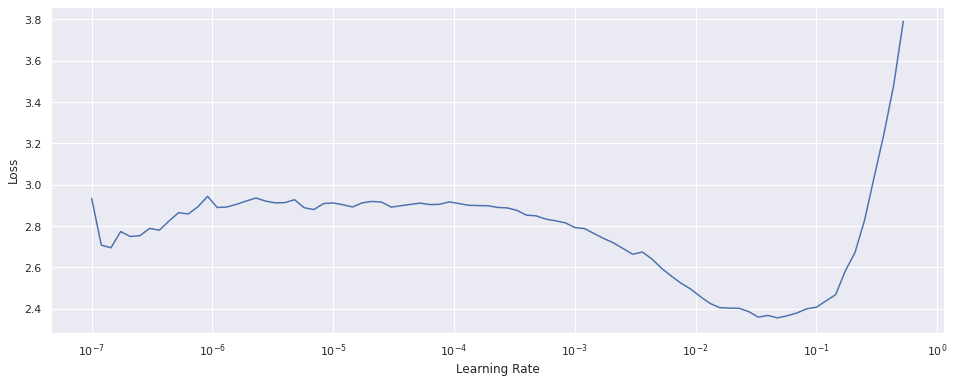

In [24]:
learn.lr_find(suggestions=True)

In [ ]:
learn.fit_one_cycle(10,slice(0.004786301031708717,9.12010818865383e-07))

epoch,train_loss,valid_loss,error_rate,accuracy,f1_score,time
0,3.129533,2.539258,0.840557,0.159443,0.167776,00:43
1,2.892222,2.131782,0.766254,0.233746,0.256249,00:42
2,2.688708,1.723887,0.647059,0.352941,0.382261,00:43
3,2.472848,1.637659,0.613003,0.386997,0.421353,00:42
4,2.301874,1.513406,0.546440,0.453560,0.478757,00:42
5,2.184410,1.478400,0.546440,0.453560,0.467478,00:43
6,2.201716,1.488965,0.510836,0.489164,0.498346,00:42
7,2.173328,1.394007,0.504644,0.495356,0.505539,00:43
8,2.167485,1.398164,0.486068,0.513932,0.523221,00:42


In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [ ]:
test = pd.DataFrame()
test['Image'] = os.listdir('test')
test.head()

In [ ]:
lis = []
for i in test['Image']:
  pred_class,pred_idx,outputs = learn.predict("/content/dataset/test/"+i)
  lis.append(pred_class)
  print(pred_class)

In [ ]:
test['Class'] = lis

In [ ]:
test.to_csv("v2_vgg16_bn.csv",index=False)

In [ ]:
#!cp resnet34.csv /content/drive/MyDrive/project/HackerEarth/STILLthe_season_to_be_jolly/
!cp /content/dataset/v2_resnet34.csv /content/drive/MyDrive/project/HackerEarth/STILLthe_season_to_be_jolly/